In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-dataset/train.csv
/kaggle/input/black-friday-sales-dataset/test.csv


# Black Friday Sales Project

Black Fiday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. 
Many stores offer highly promoted sales on Black Friday and open very early(sometimes as early as midnight[2]), or may even start their sales at some time on Thanksgiving.

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


## Loading the Data.

In [3]:
train=pd.read_csv("/kaggle/input/black-friday-sales-dataset/train.csv")
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## Data Understanding

In [4]:
train.shape

(550068, 12)

In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

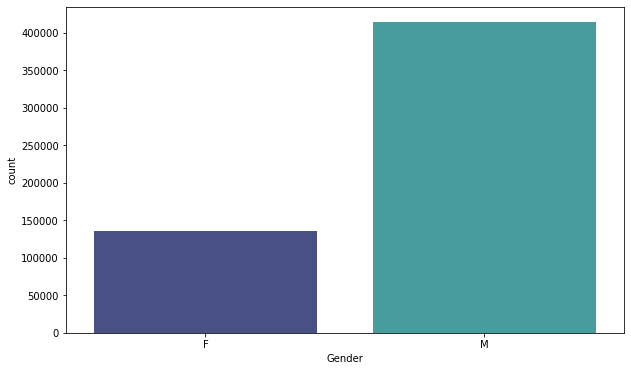

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Gender', palette='mako')
# The countplot shows the occurences of the gender in the dataset

the count of male is higher than female

<AxesSubplot:xlabel='Gender', ylabel='Marital_Status'>

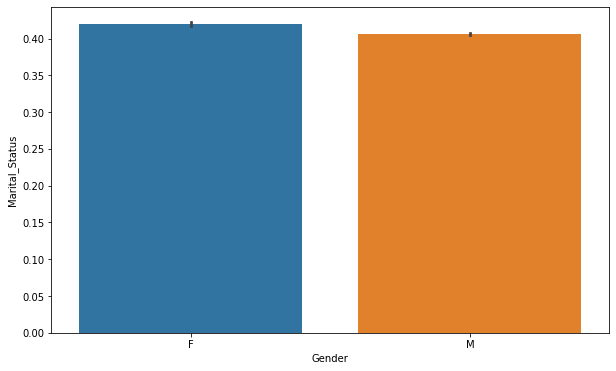

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Marital_Status',data=train)

Female's marital status is higher than male one

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

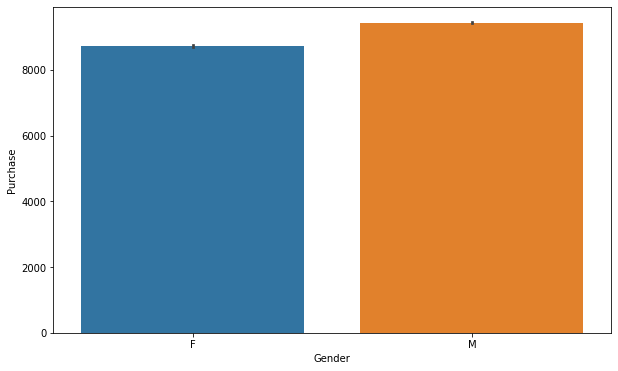

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Purchase',data=train)

Higher purchases have been done by the male gender as compare to the female

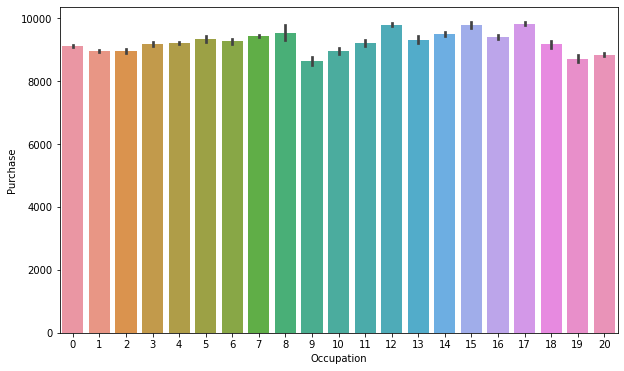

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase',data=train);

Occupation has a direct effect on the purchases done by the consumer and the occupation codes 12,15, 17 have higher purchases.

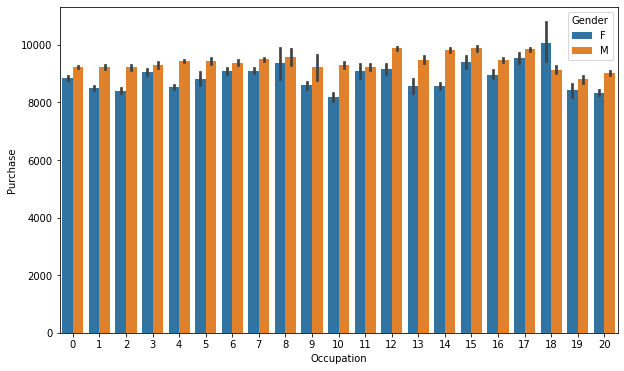

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase',hue='Gender',data=train);

Female gender in the occupation 18 with higher purchases compared to others.

### Outlier Detection
#### Checking the presence of outliers using BoxPlot

Using boxplot we can detect the presence of outliers in the data.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

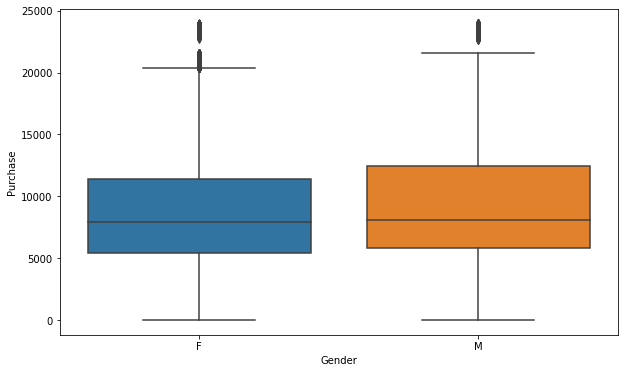

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Purchase',data=train)

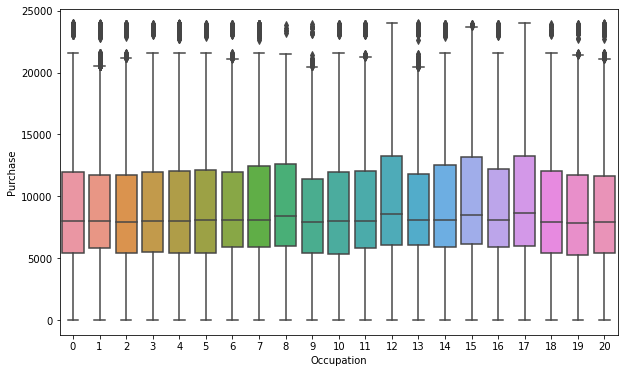

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Occupation', y='Purchase',data=train);

The Purchase column has outliers which may effect the performance of the ml models.

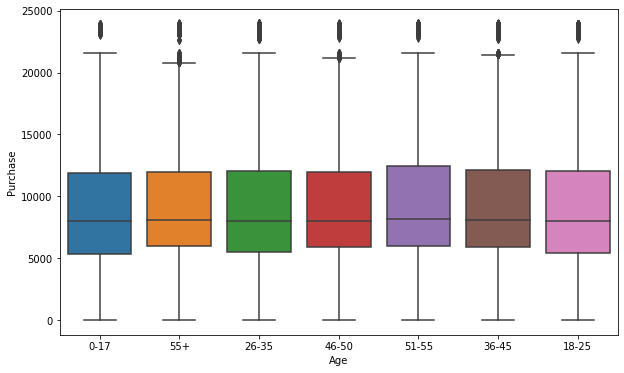

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='Purchase',data=train);

Again,We can see that Purchase over 20,000 is outlier

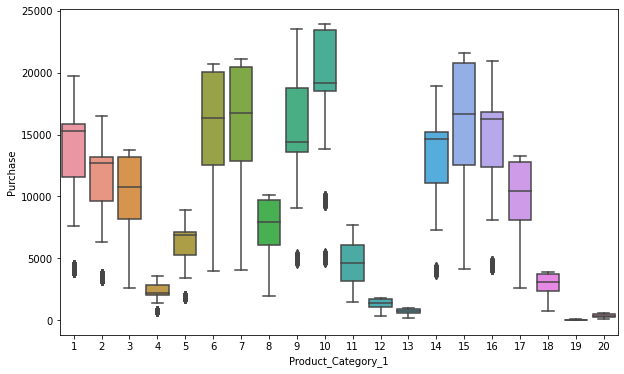

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Product_Category_1', y='Purchase',data=train);

Outliers are also present in the Product category as well

## Data Preprocessing

Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.

In [17]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [18]:
train['Product_ID'] = train['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
train['Product_ID'] = ss.fit_transform(train['Product_ID'].values.reshape(-1,1))
# Replacing 'P00' with no values and scaling the ProductID column.

In [19]:
train.drop(['Product_Category_3'],axis=1,inplace=True)
## There are more than 50% missing values present in the Product_category_column,
## so we will drop that column

In [20]:
train['Product_Category_2']=train['Product_Category_2'].fillna(train['Product_Category_2'].mean())
## The missing data in the product category 2 column have been imputed using mean.

In [21]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

As we can see the missing values have been successfully imputed and now there are no null values present in the dataset

In [22]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,1.953267,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,1.953267,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,1.953267,F,55+,1,C,2,0,20,9.842329,365


### Label Encoding
it's a technique used to turn categorical variables to numeric values.

In [23]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    train[i]=le.fit_transform(train[i])
train.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [24]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4+,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


In [25]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+','4')
## Values in the Stay_In_Current_City_Years column has been changed from 4+ to 4

In [26]:
train['Gender']=train['Gender'].astype(int)
train['Age']=train['Age'].astype(int)
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)
## The gender, Age and Stay_In_Current_City_Years values are changed to integer types.

In [27]:
train['City_Category']=train['City_Category'].astype('category')
## The type of city_category has been changed from int to category

In [28]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


### Distribution Plot
- The distribuion plot shows us how the overall data is distributed in the dataframe.
- In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined
- For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. 
- In cases where on tail is long but the other tail is fat, skewness does not obey a simple rule.
- For eg. a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where on e tail is long and thin, and the other is short but fat.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

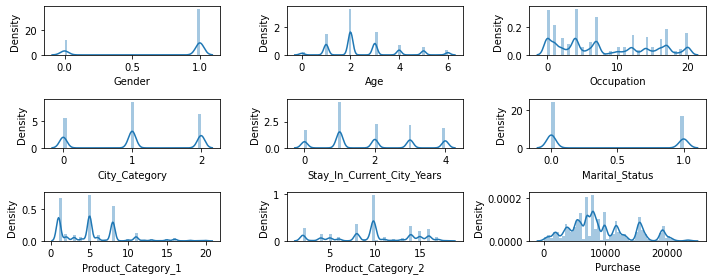

In [29]:
rows=3
cols=3
fig, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=train.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(train[col[index]],ax=ax[i][j])
        index+=1
plt.tight_layout()

The distribution plot helps us to detect the skewness of the data. Purchase column has skewness

### Log transformation
The log transformation is, arguably, the most popular among the different types of transformation used to transform skewed data to approximately conform to normality. If the original data follows a lon-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

In [30]:
train['Purchase']=np.log(train['Purchase'])

In [31]:
train=pd.get_dummies(train)
train.head()
## get_dummies() function is used to convert
# categorical variable into dummy/indicator variables

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1


## Train test split

In [32]:
y=train['Purchase']
X=train.drop('Purchase',axis=1)

In [33]:
X.shape, y.shape

((550068, 12), (550068,))

Features

In [34]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,0,0,1


In [35]:
# Labels
y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

In [36]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(440054, 12) (110014, 12) (440054,) (110014,)


### Scaling the data

In [37]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
## standardScaler standardize a feature by subtracting the mean
#and then scaling to unit variance

## ML Models

### Linear Regression

In [38]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_test_pred=lr.predict(X_test)

In [40]:
r2score=r2_score(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('r2_score: ', r2score )
print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

r2_score:  0.2016460614925666
mae:  0.4556495510088039
mse:  0.44379427501382107
rmse:  0.6661788611280165


Our model is not very accurate to predict the purchases or the target column because r2_score is low and rmse is high.

### Decision Tree Regressor

In [41]:
dt=DecisionTreeRegressor(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [42]:
# predicting train
y_train_preds=dt.predict(X_train)
#predicting on test
y_test_preds=dt.predict(X_test)

In [43]:
rmse_train=(np.sqrt(metrics.mean_squared_error(y_train,y_train_preds)))
rmse_test=(np.sqrt(metrics.mean_squared_error(y_test,y_test_preds)))
print('rmse train :',str(rmse_train))
print('rmse test :',str(rmse_test))
print('-'*50)
print('RSquared train :', dt.score(X_train,y_train))
print('RSquared test :', dt.score(X_test,y_test))

rmse train : 0.36804082144062517
rmse test : 0.3689196428165279
--------------------------------------------------
RSquared train : 0.7519510621944243
RSquared test : 0.7551628386617383


Decision tree regressor is better compared to lr as it can be observed that the root mean square error is less as compared to the previours model and rsquared value is higher in this model

### Random Forest Regressor

In [44]:
rfr=RandomForestRegressor().fit(X_train,y_train)

In [45]:
# predicting train
y_train_preds_rfr=rfr.predict(X_train)
#predicting on test
y_test_preds_rfr=rfr.predict(X_test)

In [46]:
rmse_train=(np.sqrt(metrics.mean_squared_error(y_train,y_train_preds_rfr)))
rmse_test=(np.sqrt(metrics.mean_squared_error(y_test,y_test_preds_rfr)))
print('rmse train :',str(rmse_train))
print('rmse test :',str(rmse_test))
print('-'*50)
print('RSquared train :', rfr.score(X_train,y_train))
print('RSquared test :', rfr.score(X_test,y_test))

rmse train : 0.13141186591587833
rmse test : 0.3498226782940023
--------------------------------------------------
RSquared train : 0.9683761637369532
RSquared test : 0.7798545582204851


### Test data

In [47]:
test=pd.read_csv("/kaggle/input/black-friday-sales-dataset/test.csv")
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [48]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

null values in the test data have to be treated as well

In [49]:
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
test['Product_ID'] = ss.fit_transform(test['Product_ID'].values.reshape(-1,1))
# Replacing 'P00' with no values and scaling the ProductID column.

In [50]:
test.drop(['Product_Category_3'],axis=1,inplace=True)
## There are more than 50% missing values present in the Product_category_column,
## so we will drop that column

In [51]:
test['Product_Category_2']=test['Product_Category_2'].fillna(test['Product_Category_2'].mean())
## The missing data in the product category 2 column have been imputed using mean.

In [52]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [53]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


#### Label Encoding test categorical data

In [54]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    test[i]=le.fit_transform(test[i])
test.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [55]:
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+','4')
## Values in the Stay_In_Current_City_Years column has been changed from 4+ to 4

In [56]:
test['Gender']=test['Gender'].astype(int)
test['Age']=test['Age'].astype(int)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)
test['City_Category']=test['City_Category'].astype('category')
## The gender, Age and Stay_In_Current_City_Years values are changed to integer types.

In [57]:
test = pd.get_dummies(test)
# dummies are created for the test set

In [58]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.0,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.0,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.0,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.0,0,0,1


### Shape of the train data

In [59]:
train.shape

(550068, 13)

#### Shape of the test data

In [60]:
test.shape

(233599, 12)

In [61]:
test_preds_rfr=rfr.predict(test)
len(test_preds_rfr)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


233599

In [62]:
id_frame=pd.read_csv('/kaggle/input/black-friday-sales-dataset/test.csv')

In [63]:
ID_info=id_frame[["User_ID", "Product_ID"]]
ID_info.head()
## Using User_id and Product_Id form the test set

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [64]:
predictions=pd.DataFrame(test_preds_rfr, columns=['Purchase'])
predictions["User_ID"]=ID_info["User_ID"]
predictions["Product_ID"]=ID_info["Product_ID"]
predictions.head()
# Predictions have been save in the form of a dataframe

,Purchase,User_ID,Product_ID
0,9.499113,1000004,P00128942
1,9.612891,1000009,P00113442
2,4.566345,1000010,P00288442
3,4.566345,1000010,P00145342
4,4.541774,1000011,P00053842


In [65]:
predictions.to_csv('BlackFridayPredictions.csv', index=False)
# Finally converted the prediction into csv format